In [ ]:
MAX VOTING AVERAGING AND WEIGHTED AVERAGE VOTING

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.datasets import make_moons

In [3]:
x,y = make_moons(n_samples=500, noise=0.05)

In [5]:
df = {'x1':x[:,0],'x2':x[:,1],'y':y}

In [6]:
dataset = pd.DataFrame(df)

In [7]:
dataset

,x1,x2,y
0,1.628614,-0.294512,1
1,1.017751,0.254173,0
2,1.232290,-0.463514,1
3,1.611740,-0.218011,1
4,0.253869,0.900563,0
...,...,...,...
495,-0.952454,0.111937,0
496,0.168818,0.131133,1
497,0.629640,0.820394,0
498,0.260833,-0.174733,1


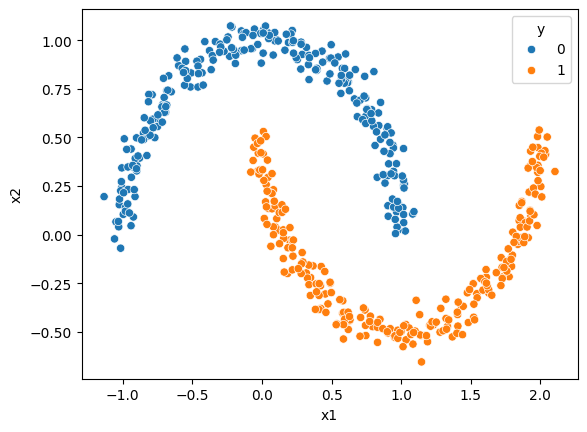

In [9]:
sns.scatterplot(x='x1',y='x2', data = dataset, hue ='y')
plt.show()

In [11]:
x_a = dataset.iloc[:,:-1]
y_a = dataset['y']

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
x_train, x_test, y_train, y_test = train_test_split(x_a,y_a, test_size = 0.2, random_state = 42)

In [14]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

In [15]:
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)
dt.score(x_train,y_train)*100 , dt.score(x_test, y_test)*100

(100.0, 100.0)

In [16]:
sv = SVC()
sv.fit(x_train,y_train)
sv.score(x_train,y_train)*100 , sv.score(x_test, y_test)*100

(100.0, 100.0)

In [17]:
gnb = GaussianNB()
gnb.fit(x_train,y_train)
gnb.score(x_train,y_train)*100 , gnb.score(x_test, y_test)*100

(88.5, 88.0)

In [19]:
from sklearn.ensemble import VotingClassifier

In [21]:
 li = [('dt1',DecisionTreeClassifier()),('sv1',SVC()),('gnb1',GaussianNB())]

In [24]:
vc = VotingClassifier(li,weights = [5,4,7])
vc.fit(x_train,y_train)

VotingClassifier(estimators=[('dt1', DecisionTreeClassifier()), ('sv1', SVC()),
                             ('gnb1', GaussianNB())],
                 weights=[5, 4, 7])

In [23]:
vc.score(x_train,y_train)*100 , vc.score(x_test,y_test)*100

(100.0, 100.0)

In [27]:
prd = {'dt':dt.predict(x_test), 'svm':sv.predict(x_test),'gnb':gnb.predict(x_test),'vc':vc.predict(x_test)}

In [28]:
pd.DataFrame(prd)

,dt,svm,gnb,vc
0,1,1,0,1
1,0,0,0,0
2,0,0,0,0
3,0,0,0,0
4,0,0,0,0
...,...,...,...,...
95,1,1,1,1
96,0,0,0,0
97,0,0,0,0
98,0,0,1,0


In [ ]:
MAX VOTING AVERAGING AND WEIGHTED AVERAGE VOTING(Classification)

In [ ]:
BAGGING (BAGGING META-ESTIMATOR,RANDOM FOREST)